In [6]:
#extract data

import praw
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# Configure as suas credenciais da API do Reddit
reddit = praw.Reddit(
    client_id='id', #change here
    client_secret='scret', #change here
    user_agent='YOUR_USER_AGENT'
)


# Select the subreddit
subreddit = reddit.subreddit('instacart')

# List to store texts
texts = []

# Fetch the latest post
latest_post = next(subreddit.new(limit=1)) # change here to get more data

# Add the post title and text to the list
texts.append(f'Title: {latest_post.title}')
texts.append(f'Text: {latest_post.selftext}')

# Recursive function to fetch comments and replies
def fetch_comments(comment, level=0):
    indentation = '    ' * level
    texts.append(f'{indentation} Comment by {comment.author}: {comment.body}')
    for reply in comment.replies:
        fetch_comments(reply, level + 1)

# Expand and fetch all comments of the latest post
latest_post.comments.replace_more(limit=None)
for comment in latest_post.comments.list():
    fetch_comments(comment)

In [ ]:
#save data to use it on github
with open('list_140k.txt', 'w', encoding='utf-8') as file:
    file.write(str(texts))

In [1]:
# Read the contents of the file into a list
with open('list_140k.txt', 'r', encoding='utf-8') as file:
    texts = file.readlines()

Total positive sentiments: 44
Total negative sentiments: 39


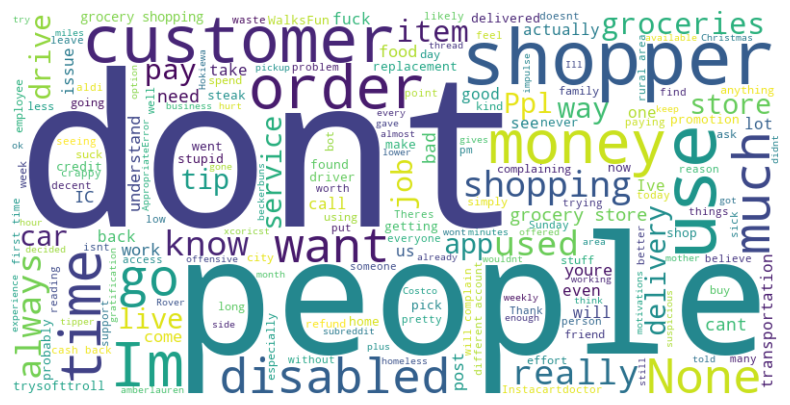

Reasons why customers like the Instacart service (Total: 19):
Comment by Teirdalin: Because I live off the side of the highway like fifteen minutes drive from the store with no sidewalks or busses going out to our location at all and I can't drive.  
So I'm kinda just, forced to.   Uber there and back costs more than ordering from instacart and I do not even think uber comes to our location for some insane reason.
--------------------------------------------------------------------------------
    Comment by Embarrassed_Swan_877: Too bad that decent tipper customers like yourself I’ll never get seeing I don’t own a bot . Bits are a 3rd party app which breaks into the instacart platform and shoppers who use them program these apps only to accept batches that are decent and so I see not is beneficial to me seeing low tips and high miles from the store to the customers home .. I miss the vip customers that I used to receive prior to the bot issue .  Always so appreciative and gave nice ti

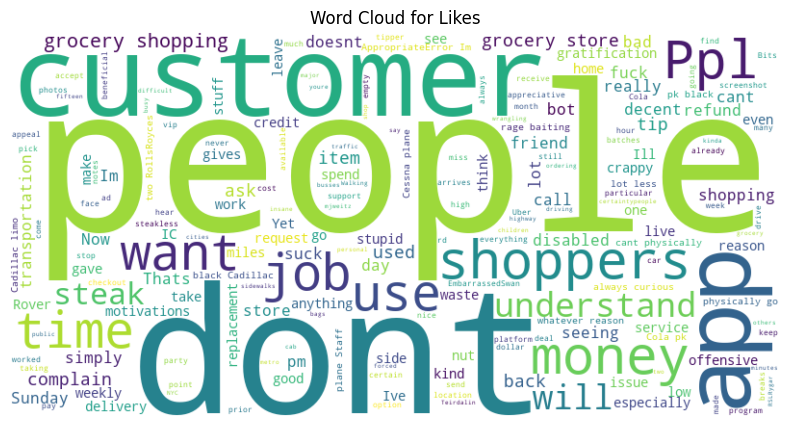

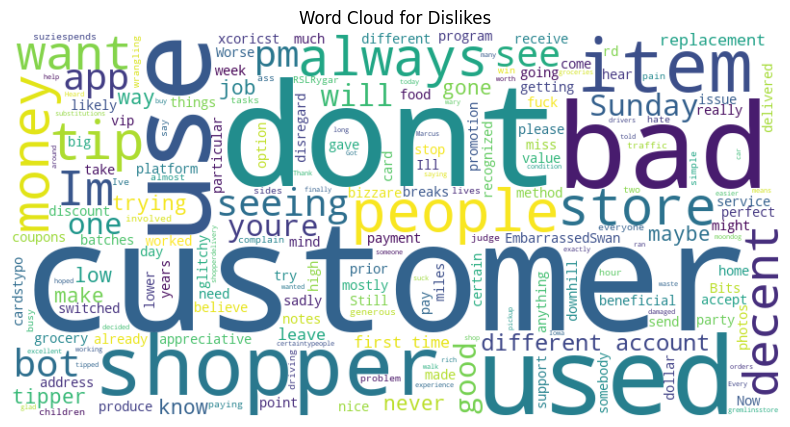

Competitor mentions found in text: Comment by Teirdalin: Because I live off the side of the highway like fifteen minutes drive from the store with no sidewalks or busses going out to our location at all and I can't drive.  
So I'm kinda just, forced to.   Uber there and back costs more than ordering from instacart and I do not even think uber comes to our location for some insane reason.
Competitors mentioned: ['Uber', 'uber']
--------------------------------------------------------------------------------
Competitor mentions count (descending order):
uber: 2


In [5]:

#start from the list already saved

# Remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Remove emojis from the list of texts
texts_no_emojis = [remove_emojis(text) for text in texts]

# Custom stop words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["title", "text", "comment by","instacart","comment", "Título" ,"Texto" ,"Comentário por", "Comentário",
                          "título" ,"texto" ,"comentário por", "comentário","comentario","comentrio","por", "by"])

# 1. Sentiment Analysis and count of positive and negative sentiments
positive_count = 0
negative_count = 0
sentiments = []

for text in texts_no_emojis:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)
    if sentiment > 0:
        positive_count += 1
    elif sentiment < 0:
        negative_count += 1
    #print(f'Text: {text}\nSentiment: {sentiment}\n')

print(f"Total positive sentiments: {positive_count}")
print(f"Total negative sentiments: {negative_count}")

# 2. Word Cloud
# Clean the text
all_text = ' '.join(texts_no_emojis)
all_text = re.sub(r'[^A-Za-z\s]', '', all_text)  # Remove non-alphabetic characters

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Find reasons why customers like the Instacart service
likes = []
pattern_like = re.compile(r'\b(like|love|enjoy|prefer|appreciate|happy|satisfied|pleased)\b', re.IGNORECASE)
for text in texts_no_emojis:
    if pattern_like.search(text):
        likes.append(text)

print(f"Reasons why customers like the Instacart service (Total: {len(likes)}):")
for like in likes:
    print(like)
    print('-' * 80)

# 4. Find reasons why customers do not like the Instacart service
dislikes = []
pattern_dislike = re.compile(r'\b(dislike|hate|annoy|frustrated|unhappy|dissatisfied|displeased|bad)\b', re.IGNORECASE)
for text in texts_no_emojis:
    if pattern_dislike.search(text):
        dislikes.append(text)

print(f"Reasons why customers do not like the Instacart service (Total: {len(dislikes)}):")
for dislike in dislikes:
    print(dislike)
    print('-' * 80)

# Function to generate and display a word cloud
def generate_wordcloud(text_list, title):
    # Join all texts in the list into one string
    all_text = ' '.join(text_list)
    # Clean the text
    all_text = re.sub(r'[^A-Za-z\s]', '', all_text)  # Remove non-alphabetic characters
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(all_text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display word cloud for likes
generate_wordcloud(likes, "Word Cloud for Likes")

# Generate and display word cloud for dislikes
generate_wordcloud(dislikes, "Word Cloud for Dislikes")

# Lista de competidores
competitors = [
    "amazon",
    "walmart",
    "shipt",
    "freshdirect",
    "peapod",
    "kroger",
    "doordash",
    "uber",
    "grubhub",
    "skipthedishes"
]
# Regular expression to find sentences containing competitor names
pattern = re.compile(r'\b(?:' + '|'.join(competitors) + r')\b', flags=re.IGNORECASE)

# Iterate over each text in the texts list and find sentences containing competitor names
for text in texts:
    matches = re.findall(pattern, text)
    if matches:
        print(f"Competitor mentions found in text: {text}")
        print("Competitors mentioned:", matches)
        print('-' * 80)

# Counter for mentioned competitors
competitor_counter = Counter()

# Iterate over each text in the texts list and count the mentions of competitors
for text in texts:
    matches = re.findall(pattern, text)
    matches = [match.lower() for match in matches]  # Convert matches to lowercase
    competitor_counter.update(matches)

# Print the competitors mentioned in descending order of frequency
print("Competitor mentions count (descending order):")
for competitor, count in competitor_counter.most_common():
    print(f"{competitor}: {count}")

